##### 필요한 라이브러리 임포트, 현재 디렉토리 파일 목록 출력

In [7]:
# https://www.kaggle.com/code/erenicoz/traffic-signs-classification
# https://www.kaggle.com/code/kimbumju/cnn-traffic-signs

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import os

path = os.getcwd() # 현재 디렉토리 선언

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\AIpj\cnn copy.ipynb
c:\AIpj\data0.pickle
c:\AIpj\data1.pickle
c:\AIpj\data2.pickle
c:\AIpj\data3.pickle
c:\AIpj\data4.pickle
c:\AIpj\data5.pickle
c:\AIpj\data6.pickle
c:\AIpj\data7.pickle
c:\AIpj\data8.pickle
c:\AIpj\datasets_preparing.py
c:\AIpj\grayscale.ipynb
c:\AIpj\histogram.ipynb
c:\AIpj\histogram_1.ipynb
c:\AIpj\htest.ipynb
c:\AIpj\input.py
c:\AIpj\labels.pickle
c:\AIpj\label_names.csv
c:\AIpj\mean_image_gray.pickle
c:\AIpj\mean_image_rgb.pickle
c:\AIpj\overfitting_small_data.png
c:\AIpj\std_gray.pickle
c:\AIpj\std_rgb.pickle
c:\AIpj\test.ipynb
c:\AIpj\test.pickle
c:\AIpj\test1.ipynb
c:\AIpj\train.pickle
c:\AIpj\training_examples.png
c:\AIpj\valid.pickle
c:\AIpj\__pycache__\datasets_preparing.cpython-38.pyc


In [8]:
label_names = pd.read_csv(path + '\\label_names.csv')
label_names.head(10)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [9]:
data = pd.read_pickle(path + '\\data0.pickle')
print('keys:', data.keys())

keys: dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])


In [10]:
x_train = data['x_train']
x_validation = data['x_validation']
print(x_train)

# print(x_train.shape, x_validation.shape) # 순서를 ('데이터 샘플 수, '세로', '가로', '채널') 로 변경
x_train = x_train.transpose(0, 1, 2, 3)
x_train = x_train.transpose(0, 2, 3, 1) # 순서 변경
x_validation = x_validation.transpose(0, 2, 3, 1) # 순서 변경

x_train.shape # shape 확인

[[[[ 13  60  57 ...  19  14  10]
   [ 15  56  57 ...  49  42  34]
   [ 17  56  57 ...  48  38  32]
   ...
   [ 35  41  45 ...  58  59  21]
   [ 37  39  44 ...  58  58  17]
   [  8  10  13 ...  57  57  16]]

  [[ 12  56  52 ...  17  13  10]
   [ 13  50  50 ...  44  39  33]
   [ 15  49  50 ...  42  34  28]
   ...
   [ 35  41  45 ...  54  54  20]
   [ 36  38  41 ...  54  54  16]
   [  7  10  13 ...  53  53  14]]

  [[ 11  51  45 ...  17  13   9]
   [ 12  45  44 ...  43  38  30]
   [ 13  44  43 ...  41  31  24]
   ...
   [ 27  34  38 ...  48  48  18]
   [ 27  30  34 ...  48  49  14]
   [  5   7   9 ...  47  48  13]]]


 [[[ 13  17  18 ...  28  30  14]
   [ 28  35  36 ...  28  29  14]
   [ 27  33  37 ...  27  28  15]
   ...
   [ 25  37  26 ...  66  71  42]
   [ 27  48  37 ...  69  70  42]
   [ 27  56  48 ...  39  37  21]]

  [[ 11  15  19 ...  26  26  12]
   [ 25  31  34 ...  24  26  13]
   [ 26  29  34 ...  24  25  14]
   ...
   [ 25  40  31 ...  59  73  48]
   [ 28  50  41 ...  60  73  46

(86989, 32, 32, 3)

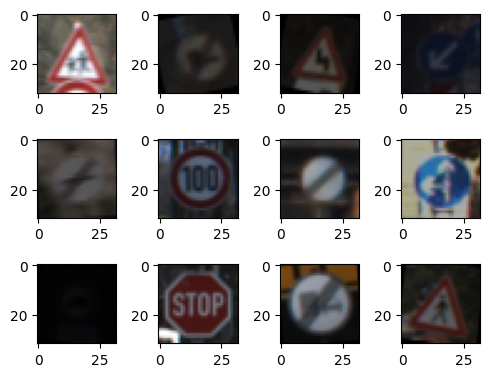

In [11]:
# x_train 일부 이미지 출력

plt.figure(figsize=(5,5)) # 그림 크기 5x5
for i in range(428,440): # 12장 출력
    plt.subplot(4,4,(i%12)+1)
    plt.imshow(x_train[i].astype(np.uint8))
    plt.tight_layout() # 각각 서브플롯 사이 간격 최적화

In [12]:
# 데이터 개수 히스토그램

import cv2

from datasets_preparing import local_histogram_equalization

train_data = pd.read_pickle(path + '\\train.pickle')
valid_data = pd.read_pickle(path + '\\valid.pickle')
test_data = pd.read_pickle(path + '\\test.pickle')
labels_data = pd.read_pickle(path + '\\labels.pickle')

train_images = train_data['features']
train_labels = train_data['labels']

valid_images = valid_data['features']
valid_labels = valid_data['labels']

test_images = test_data['features']
test_labels = test_data['labels']

# print(train_labels.mean())
# print(train_labels.std())
print(len(train_labels))
print(len(valid_labels))
print(len(test_labels))


# train_data(local_histogram_equalization)

34799
4410
12630


In [13]:
test_data

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8),
 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ..

In [14]:
# Local Histogram Equalization
from collections import Counter # 리스트 안에 요소별로 개수를 확인하는 방법, collections 모듈의 Counter 함수

train_labels # 이 리스트의
counted = Counter(train_labels) # 라벨별로 개수를 세어줌
print(counted) # 라벨별 개수 출력

Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})


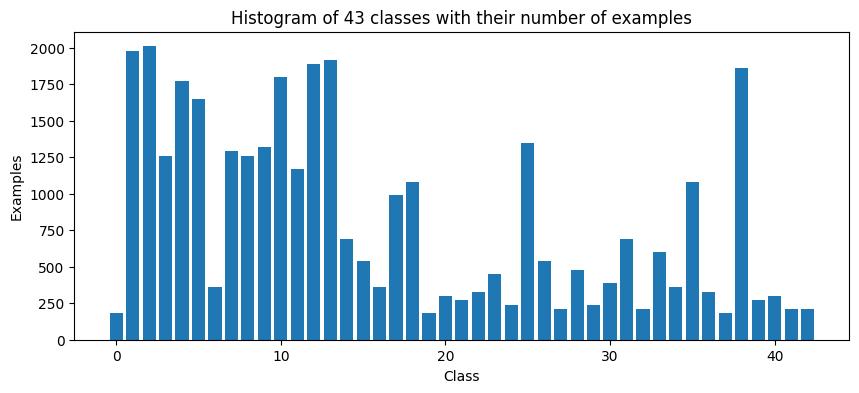

<Figure size 500x1000 with 0 Axes>

In [15]:
# 그래프 크기 조절
plt.figure(figsize=(10, 4))

# 그래프 그리기
plt.bar(counted.keys(), counted.values())

# 그래프 레이블 추가
plt.xlabel('Class')
plt.ylabel('Examples')
plt.title('Histogram of 43 classes with their number of examples')

plt.figure(figsize=(5, 10))

# 그래프 보여주기
plt.show()

In [16]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

x_train = x_train/255.0
x_test = x_test/255.0
n_train = y_train.shape[0]
n_test = y_test.shape[0]

In [17]:
train_r = pd.DataFrame({'label':train_labels})
print(len(train_r))
train_r.head()

34799


,label
0,41
1,41
2,41
3,41
4,41


In [18]:
pixel_n=0
for i in range(32):
    for j in range(32):
        pixel_n+=1
        train_r['pixel{}'.format(pixel_n)] = train_images[:,i,j,0]


KeyboardInterrupt: 

In [ ]:
#r 채널의 head값
train_r.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,41,28,27,27,27,27,29,49,53,49,...,28,27,26,27,29,28,27,27,27,26
1,41,28,26,27,28,28,31,48,50,42,...,26,27,28,28,28,27,27,27,27,29
2,41,29,29,30,30,32,38,51,54,58,...,30,30,30,28,28,27,28,29,28,30
3,41,31,29,30,29,30,38,50,52,52,...,29,27,27,27,29,28,28,28,27,27
4,41,33,31,32,31,33,45,55,53,56,...,26,26,27,28,27,26,25,25,26,27


In [ ]:
#r 채널의 describe
train_r.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,...,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000
mean,15.738297,89.175551,89.278542,89.578580,89.914164,90.118222,90.343774,90.667663,91.002615,91.233570,...,79.076037,77.971062,76.537142,75.116555,73.709762,72.313256,70.827265,69.777637,69.284060,69.105233
std,12.002569,75.838958,75.652635,75.742438,75.714266,75.800900,75.905803,75.896794,75.766163,75.531696,...,67.461261,67.200489,66.881634,66.584657,66.064178,65.470351,64.609127,63.980990,63.720778,64.009979
min,0.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000
25%,5.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,32.000000,32.000000,32.000000,...,29.000000,29.000000,28.000000,27.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000
50%,12.000000,59.000000,59.000000,60.000000,60.000000,61.000000,60.000000,61.000000,61.000000,62.000000,...,54.000000,53.000000,51.000000,50.000000,49.000000,48.000000,46.000000,46.000000,45.000000,45.000000
75%,25.000000,128.000000,128.000000,129.000000,130.000000,130.000000,130.000000,131.000000,131.000000,131.000000,...,107.000000,104.000000,102.000000,100.000000,98.000000,94.000000,91.000000,90.000000,89.000000,89.000000
max,42.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
#train 데이터의 Green 채널의 레이블 값
train_g = pd.DataFrame({'label':train_labels})
print(len(train_g))
train_g.head()


34799


,label
0,41
1,41
2,41
3,41
4,41


In [ ]:

pixel_n=0
for i in range(32):
    for j in range(32):
        pixel_n+=1
        train_g['pixel{}'.format(pixel_n)] = train_images[:,i,j,1]


C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3490355681.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_g['pixel{}'.format(pixel_n)] = train_images[:,i,j,1]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3490355681.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_g['pixel{}'.format(pixel_n)] = train_images[:,i,j,1]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3490355681.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [ ]:
train_g.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,41,25,24,24,24,25,27,39,33,28,...,22,22,23,24,26,25,24,24,23,22
1,41,24,23,24,26,27,29,37,30,22,...,23,24,24,24,23,23,23,23,24,26
2,41,25,26,27,28,30,34,35,26,35,...,26,25,25,23,23,23,24,25,24,26
3,41,28,26,27,26,28,36,36,27,30,...,25,23,22,22,24,23,23,23,23,23
4,41,27,25,26,26,29,35,33,25,38,...,23,22,22,23,23,23,22,22,22,22


In [ ]:
train_g.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,...,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000
mean,15.738297,87.482772,87.461622,87.622834,87.833271,87.964654,88.141585,88.352453,88.554757,88.585563,...,75.382252,74.567401,73.425961,72.232507,71.094859,69.986207,68.569183,67.599299,67.141268,66.920055
std,12.002569,76.191101,76.127201,76.109377,76.132091,76.169601,76.313599,76.269119,76.186095,75.995360,...,65.746870,65.666699,65.446500,65.241679,64.906179,64.551679,63.802031,63.127859,62.867821,63.167258
min,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
25%,5.000000,29.000000,29.000000,29.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,28.000000,27.000000,27.000000,26.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000
50%,12.000000,56.000000,56.000000,57.000000,57.000000,57.000000,57.000000,57.000000,58.000000,58.000000,...,51.000000,50.000000,49.000000,47.000000,46.000000,45.000000,44.000000,44.000000,43.000000,43.000000
75%,25.000000,125.000000,125.000000,126.000000,125.000000,126.000000,126.000000,127.000000,127.000000,127.000000,...,101.000000,99.000000,98.000000,96.000000,93.000000,91.000000,88.000000,87.000000,86.000000,85.000000
max,42.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
#train 데이터의 Blue채널의 레이블 값
train_b = pd.DataFrame({'label':train_labels})
print(len(train_b))
train_b.head()

34799


,label
0,41
1,41
2,41
3,41
4,41


In [ ]:

pixel_n=0
for i in range(32):
    for j in range(32):
        pixel_n+=1
        train_b['pixel{}'.format(pixel_n)] = train_images[:,i,j,2]


C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3421342109.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_b['pixel{}'.format(pixel_n)] = train_images[:,i,j,2]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3421342109.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_b['pixel{}'.format(pixel_n)] = train_images[:,i,j,2]
C:\Users\kts_9\AppData\Local\Temp\ipykernel_12280\3421342109.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [ ]:
train_b.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,41,24,23,22,22,23,25,37,31,28,...,20,20,21,22,23,23,22,22,21,20
1,41,24,23,24,25,27,30,39,31,22,...,21,21,21,22,21,22,22,22,23,25
2,41,25,26,27,28,30,34,35,27,36,...,23,22,22,20,20,20,22,23,22,24
3,41,26,24,26,27,29,36,35,27,30,...,21,19,20,22,24,23,22,22,22,21
4,41,25,24,25,24,27,33,31,25,40,...,21,20,20,21,21,21,21,20,19,19


In [ ]:
train_b.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.00000,34799.000000,34799.000000,34799.000000,...,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000,34799.000000
mean,15.738297,87.161671,87.144975,87.345642,87.570419,87.767694,88.03526,88.326561,88.532946,88.470042,...,75.614903,74.516136,73.168108,71.754792,70.391534,69.117877,67.636800,66.643467,66.130349,65.881864
std,12.002569,77.361768,77.350725,77.354403,77.391606,77.491046,77.62770,77.599893,77.513138,77.260607,...,65.564228,65.354083,65.121177,64.755109,64.331528,63.924800,63.224724,62.600472,62.276470,62.543661
min,0.000000,1.000000,4.000000,3.000000,0.000000,0.000000,1.00000,2.000000,2.000000,0.000000,...,0.000000,5.000000,2.000000,5.000000,5.000000,6.000000,5.000000,3.000000,5.000000,0.000000
25%,5.000000,29.000000,29.000000,29.000000,29.000000,30.000000,30.00000,30.000000,30.000000,30.000000,...,28.000000,28.000000,27.000000,26.000000,26.000000,26.000000,25.000000,25.000000,25.000000,24.000000
50%,12.000000,52.000000,52.000000,52.000000,53.000000,53.000000,53.00000,53.000000,54.000000,54.000000,...,50.000000,49.000000,47.000000,46.000000,45.000000,44.000000,43.000000,42.000000,41.000000,41.000000
75%,25.000000,127.000000,126.000000,127.000000,128.000000,128.000000,128.00000,129.000000,129.000000,128.000000,...,101.000000,99.000000,96.000000,94.000000,90.000000,87.000000,84.000000,82.000000,82.000000,81.000000
max,42.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


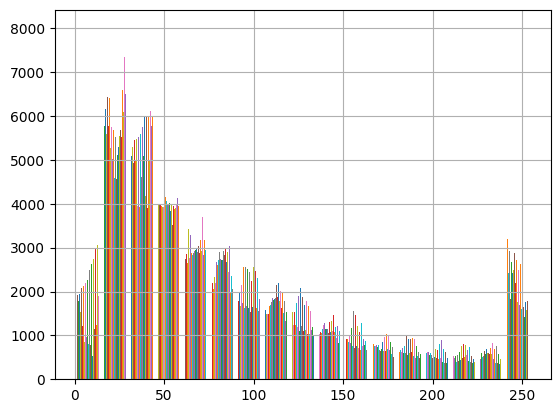

In [ ]:
np.arange(0,256,15)

bins_interval=np.arange(0,256,15)
plt.hist(train_r.iloc[:,1:10000],bins_interval)
plt.grid()

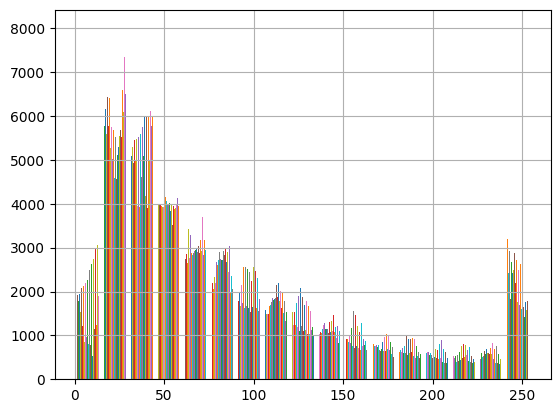

In [ ]:
bins_interval=np.arange(0,256,15)
plt.hist(train_r.iloc[:,1:],bins_interval)
plt.grid()


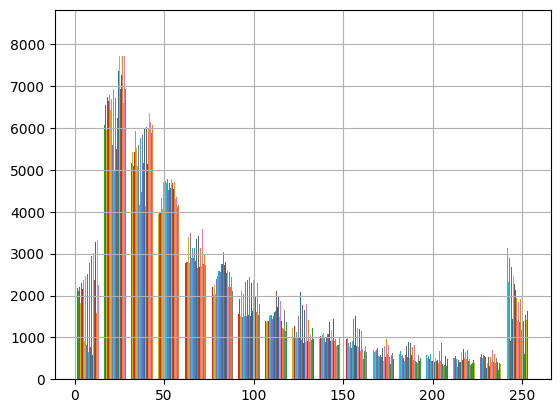

In [ ]:
plt.hist(train_g.iloc[:,1:],bins_interval)
plt.grid()

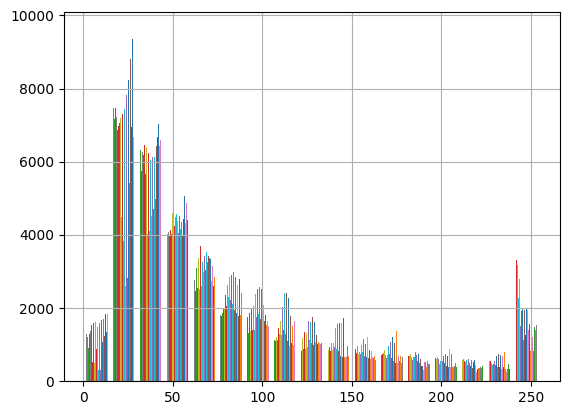

In [ ]:
plt.hist(train_b.iloc[:,1:],bins_interval)
plt.grid()

In [ ]:
print(len(train_r))
print(len(train_g))
print(len(train_b))


34799
34799
34799


In [ ]:
train_r.value_counts()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  p

In [ ]:
a=pd.read_csv("label_names.csv")
for i in range(len(a)):
    print(len(a.SignName[i]))

20
20
20
20
20
20
27
21
21
10
44
37
13
5
4
11
40
8
15
27
28
12
10
13
25
9
15
11
17
17
18
21
35
16
15
10
20
19
10
9
20
17
50


In [ ]:
train_r['label'].value_counts()

2     2010
1     1980
13    1920
12    1890
38    1860
10    1800
4     1770
5     1650
25    1350
9     1320
7     1290
3     1260
8     1260
11    1170
35    1080
18    1080
17     990
14     690
31     690
33     599
15     540
26     540
28     480
23     450
30     390
6      360
16     360
34     360
22     330
36     330
40     300
20     300
39     270
21     270
24     240
29     240
27     210
32     210
42     210
41     210
0      180
37     180
19     180
Name: label, dtype: int64

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽어들이기
img = cv2.imread('training_examples.png')

# 이미지의 mean과 std 계산하기
mean, std = cv2.meanStdDev(img)

# 출력하기
print('mean:', mean)
print('std:', std)


mean: [[164.68586178]
 [161.48904622]
 [166.54928622]]
std: [[82.04946562]
 [83.85089877]
 [80.85124346]]


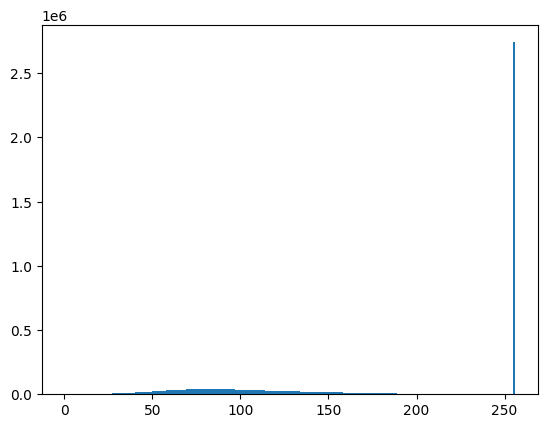

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽어들이기
img = cv2.imread('training_examples.png')

# 이미지의 히스토그램 계산하기
hist, bins = np.histogram(img.ravel(), 256, [0,256])

# 히스토그램 그리기
plt.hist(img.ravel(), 256, [0,256])
plt.show()

In [ ]:
from PIL import Image
import numpy as np

# PNG 파일을 읽어서 이미지 객체로 변환합니다.
image = Image.open("training_examples.png")

# 이미지 객체를 numpy 배열로 변환합니다.
data = np.array(image)

# R, G, B 값을 각각 구합니다.
R = data[:, :, 0]
G = data[:, :, 1]
B = data[:, :, 2]

# 전체적으로 평균과 표준편차를 구합니다.
mean_R = np.mean(R)
std_R = np.std(R)
mean_G = np.mean(G)
std_G = np.std(G)
mean_B = np.mean(B)
std_B = np.std(B)

print("R 평균: {:.2f}, 표준편차: {:.2f}".format(mean_R, std_R))
print("G 평균: {:.2f}, 표준편차: {:.2f}".format(mean_G, std_G))
print("B 평균: {:.2f}, 표준편차: {:.2f}".format(mean_B, std_B))

R 평균: 166.55, 표준편차: 80.85
G 평균: 161.49, 표준편차: 83.85
B 평균: 164.69, 표준편차: 82.05


In [ ]:
# R, G, B 값의 평균과 표준편차
mean_R = np.mean(R)
mean_G = np.mean(G)
mean_B = np.mean(B)

std_R = np.std(R)
std_G = np.std(G)
std_B = np.std(B)

# 전체적인 평균과 표준편차를 계산합니다.
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

print("R 값의 평균: ", mean_R)
print("G 값의 평균: ", mean_G)
print("B 값의 평균: ", mean_B)

print("R 값의 표준편차: ", std_R)
print("G 값의 표준편차: ", std_G)
print("B 값의 표준편차: ", std_B)

print("전체적인 평균: ", mean)
print("전체적인 표준편차: ", std)

R 값의 평균:  166.54928622222224
G 값의 평균:  161.4890462222222
B 값의 평균:  164.68586177777777
R 값의 표준편차:  80.85124346038543
G 값의 표준편차:  83.85089876688711
B 값의 표준편차:  82.04946562395963
전체적인 평균:  [[255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]
 ...
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]
 [255. 255. 255. 255.]]
전체적인 표준편차:  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
import numpy as np
import pickle

# 데이터 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스별 이미지 데이터의 RGB 평균과 표준 편차 계산
def calculate_class_rgb_mean_std(data):
    """
    클래스별 이미지 데이터의 RGB 평균과 표준 편차를 계산하는 함수
    :param data: 이미지 데이터 배열, shape (num_samples, height, width, channels) 또는 (num_samples, height, width, channels)
    :return: RGB 평균과 표준 편차를 담은 튜플 (mean, std)
    """
    # 이미지 데이터의 각 채널별 평균 계산
    mean = np.mean(data, axis=(1, 2))
    # 이미지 데이터의 각 채널별 표준 편차 계산
    std = np.std(data, axis=(1, 2))
    return mean, std

# 클래스별 RGB 평균과 표준 편차 계산
class_mean = []
class_std = []

for i in range(43):
    # 클래스 i의 이미지 데이터
    class_data = data['x_train'][np.where(data['y_train'] == i)]
    # 클래스 i의 RGB 평균과 표준 편차 계산
    mean, std = calculate_class_rgb_mean_std(class_data)
    # 클래스 i의 RGB 평균과 표준 편차 저장
    class_mean.append(mean)
    class_std.append(std)

# 결과 출력
for i in range(43):
    print(f"클래스 {i} RGB 평균:", class_mean[i])
    print(f"클래스 {i} RGB 표준 편차:", class_std[i])

클래스 0 RGB 평균: [[171.625      212.46875    211.10416667 ... 152.88541667 159.27083333
  105.5625    ]
 [ 92.09375    136.71875    161.39583333 ... 153.64583333 157.57291667
  155.86458333]
 [ 10.54166667  13.44791667  21.1875     ...  18.01041667  11.82291667
    8.14583333]
 ...
 [137.14583333 138.11458333 131.19791667 ...  78.85416667  75.35416667
   71.64583333]
 [ 74.15625    104.09375    116.15625    ... 106.07291667  97.17708333
   71.14583333]
 [ 92.90625    131.42708333 145.14583333 ... 147.25       133.14583333
   95.1875    ]]
클래스 0 RGB 표준 편차: [[67.48352422 44.59422448 42.08609211 ... 73.31209964 76.07513818
  51.22963264]
 [25.68563076 35.67787104 40.52994756 ... 52.02202642 51.65142479
  51.0248346 ]
 [ 9.78191003  5.93518778 10.81599173 ... 10.54009684  7.75133697
   8.71299217]
 ...
 [46.25044576 45.94445691 48.5791064  ... 18.26539258 15.3378475
   5.3267782 ]
 [55.59944696 41.11925698 29.84764373 ... 28.55814419 42.88429073
  57.46719701]
 [70.68284182 53.20846283 42.106

In [ ]:
import pickle
import numpy as np
from sklearn.decomposition import PCA

# data.pickle 파일 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 데이터 포인트들의 특징을 나타내는 2차원 배열 생성
X = np.array([np.array(xi) for xi in data])

# PCA 모델 생성 및 학습
x_test = x_test.astype(float)
x_test = [float(x) for x in x_test]

pca = PCA(n_components=2)
pca.fit(X)

# 변환된 데이터 포인트들의 좌표 계산
transformed = pca.transform(X)

# 변환된 데이터 포인트들을 2차원 평면에 시각화
import matplotlib.pyplot as plt
plt.scatter(transformed[:,0], transformed[:,1])
plt.show()


NameError: name 'x_test' is not defined

In [ ]:
import numpy as np

# 데이터 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 모든 사진의 픽셀값을 1차원 배열로 변환
all_pixels = np.reshape(data['x_train'], (-1, 32*32, 3))

# 각 픽셀별 평균과 표준편차 계산
pixel_mean = []
pixel_std = []
for i in range(32*32):
    pixel_mean.append(np.mean(all_pixels[:, i, :], axis=0))
    pixel_std.append(np.std(all_pixels[:, i, :], axis=0))


# 결과 출력
print("각 픽셀의 평균:")
for i in range(32*32):
    print(f"pixel{i}평균:", pixel_mean[i])
    print(f"pixel{i}의 표준편차:", pixel_std[i])

각 픽셀의 평균:
pixel0평균: [41.73881755 47.97846854 54.57823403]
pixel0의 표준편차: [65.22397184 66.03892924 66.45586289]
pixel1평균: [57.46034556 57.96542092 58.56324363]
pixel1의 표준편차: [67.07904944 67.12978342 67.16667827]
pixel2평균: [59.23187989 60.05845567 61.12065893]
pixel2의 표준편차: [67.07366489 66.8521215  66.44934085]
pixel3평균: [62.63812666 64.96002943 67.62080263]
pixel3의 표준편차: [65.98102392 64.97352911 64.19321734]
pixel4평균: [70.32866224 72.72842543 74.16154916]
pixel4의 표준편차: [64.14031577 64.5228194  64.44160046]
pixel5평균: [74.45504604 74.1965076  73.89649266]
pixel5의 표준편차: [64.02370079 64.0183015  64.22031071]
pixel6평균: [73.10925519 71.65814068 69.74648519]
pixel6의 표준편차: [64.332955   64.21504703 64.03214705]
pixel7평균: [67.76139512 65.56549679 63.39292324]
pixel7의 표준편차: [64.16882846 64.58955985 65.30910693]
pixel8평균: [61.87685799 60.75816483 59.86663831]
pixel8의 표준편차: [65.76798811 66.0936173  66.28180815]
pixel9평균: [59.14543218 58.41974273 54.03461357]
pixel9의 표준편차: [66.33749693 66.2493631  65.

In [19]:
import pickle
import numpy as np

# data.pickle 파일 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스별로 RGB 값 추출
rgb_data = []
for i in range(43):
    class_data = data[i]
    class_rgb = np.asarray([np.asarray(x[0]) for x in class_data])
    rgb_data.append(class_rgb)

# 클래스별로 RGB 값의 평균과 표준편차 계산
rgb_means = []
rgb_stds = []
for i in range(43):
    class_rgb = rgb_data[i]
    class_rgb_mean = np.mean(class_rgb, axis=0)
    class_rgb_std = np.std(class_rgb, axis=0)
    rgb_means.append(class_rgb_mean)
    rgb_stds.append(class_rgb_std)

# 결과 출력
for i in range(43):
    print("Class {}: R_mean={}, G_mean={}, B_mean={}, R_std={}, G_std={}, B_std={}".format(
        i, rgb_means[i][0], rgb_means[i][1], rgb_means[i][2], rgb_stds[i][0], rgb_stds[i][1], rgb_stds[i][2]))


KeyError: '0'

In [ ]:
import pickle

# data.pickle 파일 로드
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# data 딕셔너리의 키 값을 출력
print(list(data.keys()))


['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train']


In [1]:
import numpy as np
import pickle

with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스별 이미지 데이터의 RGB 평균과 표준 편차 계산
def calculate_class_rgb_mean_std(data):
    # 각 채널별 평균 계산
    mean = np.mean(data, axis=(1, 2))
    # 각 채널별 표준 편차 계산
    std = np.std(data, axis=(1, 2))
    return mean, std

# 클래스별 RGB 평균과 표준 편차 계산
class_mean = []
class_std = []

for i in range(43):
    # 클래스 i의 이미지 데이터
    class_data = data['x_train'][np.where(data['y_train'] == i)]
    # 각 클래스의 RGB 평균과 표준 편차 계산
    mean, std = calculate_class_rgb_mean_std(class_data)
    # 각 클래스의 RGB 평균과 표준 편차 저장
    class_mean.append(mean)
    class_std.append(std)

# 결과 출력
for i in range(43):
    print(f"클래스 {i} RGB 평균:", class_mean[i])
    print(f"클래스 {i} RGB 표준 편차:", class_std[i])

클래스 0 RGB 평균: [[171.625      212.46875    211.10416667 ... 152.88541667 159.27083333
  105.5625    ]
 [ 92.09375    136.71875    161.39583333 ... 153.64583333 157.57291667
  155.86458333]
 [ 10.54166667  13.44791667  21.1875     ...  18.01041667  11.82291667
    8.14583333]
 ...
 [137.14583333 138.11458333 131.19791667 ...  78.85416667  75.35416667
   71.64583333]
 [ 74.15625    104.09375    116.15625    ... 106.07291667  97.17708333
   71.14583333]
 [ 92.90625    131.42708333 145.14583333 ... 147.25       133.14583333
   95.1875    ]]
클래스 0 RGB 표준 편차: [[67.48352422 44.59422448 42.08609211 ... 73.31209964 76.07513818
  51.22963264]
 [25.68563076 35.67787104 40.52994756 ... 52.02202642 51.65142479
  51.0248346 ]
 [ 9.78191003  5.93518778 10.81599173 ... 10.54009684  7.75133697
   8.71299217]
 ...
 [46.25044576 45.94445691 48.5791064  ... 18.26539258 15.3378475
   5.3267782 ]
 [55.59944696 41.11925698 29.84764373 ... 28.55814419 42.88429073
  57.46719701]
 [70.68284182 53.20846283 42.106

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # import Axes3D for 3D visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Load data from pickle file
path = 'C:\AIpj'
data = pd.read_pickle(path + './data0.pickle')


# Reshape input data to 2D arrays
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1)
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1)
y_train = data['y_train']
y_test = data['y_test']


# Standardize input data using StandardScaler
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Compute covariance matrix and its eigenvalues and eigenvectors
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# Compute explained variance and cumulative explained variance
total_var = sum(eigen_vals)
var_exp = [(i / total_var) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Print eigenvalues and variance explained
print('Eigenvalues: \n%s' % eigen_vals)
# print('Explained variance: \n%s' % var_exp)
# print('Cumulative explained variance: \n%s' % cum_var_exp)

# Perform PCA with 2 components
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

# Plot 2D scatter plot of first two principal components
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D PCA Visualization')
plt.show()

# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
x_train_pca_3d = pca_3d.fit_transform(x_train_std)

# Plot 3D scatter plot of first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_pca_3d[:, 0], x_train_pca_3d[:, 1], x_train_pca_3d[:, 2])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA Visualization')
plt.show()

x_train Shape: (86989, 3072)
y_train Shape: (86989,)


KeyboardInterrupt: 

In [12]:
import numpy as np
import pandas as pd
import pickle

# 데이터 불러오기
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 변수 이름 변경
data['X'] = data.pop('x_train')

# 변경된 변수 이름으로 데이터 사용
X = np.array(data['X']).reshape(-1, 3072)  # 4차원 배열을 2차원 배열로 reshape
y = np.array(data['y_train']).reshape(-1, 1)

# 가중치 초기화
input_size = X.shape[1]
hidden_size = 64
output_size = 1

np.random.seed(1)
w1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
w2 = np.random.randn(hidden_size, output_size)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# 학습률
lr = 0.1

# 반복 횟수
epochs = 1000

# 학습
for epoch in range(epochs):
    # 순전파 계산
    a1 = np.dot(X, w1)
    z1 = sigmoid(a1)
    a2 = np.dot(z1, w2)
    y_pred = sigmoid(a2)

    # 오차 계산
    error = y_pred - y

    # 출력층에서의 오차에 대한 미분 값 계산
    delta_output = error * y_pred * (1 - y_pred)

    # 은닉층에서의 오차에 대한 미분 값 계산
    
    delta_hidden = delta_output.dot(w2.T) * z1 * (1 - z1)

    # 가중치 갱신
    w2 -= lr * z1.T.dot(delta_output)
    w1 -= lr * X.T.dot(delta_hidden)

    # 정확도 및 오차 출력
    if epoch % 100 == 0:
        loss = np.mean(np.abs(error))
        acc = np.mean(y == np.round(y_pred)) * 100
        print(f'Epoch {epoch}: loss={loss:.4f}, accuracy={acc:.2f}%')

# 테스트
test_input = X
test_output = np.round(sigmoid(np.dot(sigmoid(np.dot(test_input, w1)), w2)))

# 정확도 출력
test_acc = np.mean(y == test_output) * 100
print(f'Test accuracy: {test_acc:.2f}%')


Epoch 0: loss=20.1634, accuracy=2.53%
Epoch 100: loss=20.0465, accuracy=2.33%
Epoch 200: loss=20.0465, accuracy=2.33%
Epoch 300: loss=20.0465, accuracy=2.33%
Epoch 400: loss=20.0465, accuracy=2.33%


KeyboardInterrupt: 

In [1]:
import pickle

# pickle 파일 불러오기
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 변수 이름 확인
print(data.keys())




dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])


NameError: name 'x_train' is not defined

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # import Axes3D for 3D visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Load data from pickle file
path = 'C:\AIpj'
data = pd.read_pickle(path + './data0.pickle')

# Reshape input data to 2D arrays
x_train = data['x_train'].reshape(data['x_train'].shape[0], -1) # 2D 배열로 변경
x_train = x_train.reshape(-1) # 1D 배열로 변경
x_test = data['x_test'].reshape(data['x_test'].shape[0], -1)
y_train = data['y_train']
y_test = data['y_test']

print("x_train Shape:", np.shape(x_train))
print("y_train Shape:", np.shape(y_train))


x_train Shape: (267230208,)
y_train Shape: (86989,)


In [1]:
import pickle
import pandas as pd
import numpy as np

# data0.pickle 파일을 열고 데이터를 로드합니다.
with open('data0.pickle', 'rb') as f:
    data = pickle.load(f)

# 클래스 별로 그룹화합니다.
groups = pd.DataFrame(data).groupby('class')

# 각 클래스별 R, G, B 평균과 표준편차를 계산합니다.
for class_name, group in groups:
    r_mean, g_mean, b_mean = np.mean(group['image'], axis=(0, 1))
    r_std, g_std, b_std = np.std(group['image'], axis=(0, 1))
    
    print(f"Class {class_name}:")
    print(f"R Mean: {r_mean:.2f}, R Std: {r_std:.2f}")
    print(f"G Mean: {g_mean:.2f}, G Std: {g_std:.2f}")
    print(f"B Mean: {b_mean:.2f}, B Std: {b_std:.2f}")


ValueError: Per-column arrays must each be 1-dimensional

In [1]:
 def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])

        class_label , class_counts = np.unique(t, return_counts=True)        
        class_accuracy = np.zeros(np.max(class_label) + 1)  # 클래스 개수에 맞게 class_accuracy 배열 생성

        for i in range(len(class_accuracy)):
            class_accuracy[i] = np.sum((y == i) & (t == i)) / float(class_counts[i])

        return accuracy, class_accuracy

In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from keras.utils.np_utils import to_categorical
from two_layer_net import TwoLayerNet
from sklearn.utils.class_weight import compute_class_weight

warnings.filterwarnings('ignore')

# 데이터 불러오기
train_df = pd.read_csv('mitbih_train.csv', header=None)
test_df = pd.read_csv('mitbih_test.csv', header=None)

# 타겟 열을 정수형으로 변환
train_df[187] = train_df[187].astype(int)

# 클래스 분포 출력
equilibre = train_df[187].value_counts()
print(equilibre)

# 각 클래스 레이블에 속하는 ECG 데이터 그리기
label = ["Non-ecotic beats","Supraventricular ectopic beats","Ventricular ectopic beats",
         "Fusion Beats","Unknown Beats"]
color = ['blue','red','green','orange','purple','black']
fig, ax = plt.subplots(5, 1, sharex=True, sharey=True,figsize=(20,12))
for i, row in enumerate(ax):
    row.plot((train_df[train_df[187] == i].iloc[0])[:-1], label=label[i], color=color[i])
    row.legend(fontsize=12)
fig.text(0.5, 0.04, 'Time(ms)', va='center', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Amplitude', va='center', ha='center', rotation='vertical', fontsize=15)
plt.show()

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# 입력 데이터와 레이블 분리
X = train_df.iloc[:, :187].values
y = train_df.iloc[:, 187].values

# PCA 수행하여 2차원으로 축소
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# 레이블 매핑
label_map = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
labels = [label_map[l] for l in y]

# 산점도 시각화
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')

# PCA를 위한 covariance matrix 계산
cov_matrix = np.cov(X.T)
eigenvalues, singularvalues ,eigenvectors = np.linalg.svd(cov_matrix)

# 고유한 레이블을 사용하여 범례 생성
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# 클래스 번호를 'N', 'S', 'V', 'F', 'Q'로 대체
for t, l in zip(legend1.get_texts(), ['N', 'S', 'V', 'F', 'Q']):
    t.set_text(l)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# eigenvalues 시각화
plt.plot(singularvalues)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues of 187-dimensional data')
plt.show()

# Two Layer Perceptron
train_data = train_df.values
test_data = test_df.values

x_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values.astype(int)
x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values.astype(int)

# 데이터 전처리
x_train = x_train.reshape(-1, 1, x_train.shape[1])
x_test = x_test.reshape(-1, 1, x_test.shape[1])

# 하이퍼파라미터 설정
input_size = x_train.shape[2]  # 입력층 크기(187)
hidden_size = 100  # 은닉층 크기
output_size = len(np.unique(y_train))  # 출력층 크기
learning_rate = 0.005  # 학습률
batch_size = 100  # 미니배치 크기
epochs = 10  # 에포크 수

# 에포크별 학습 및 평가
train_loss_list = []
train_acc_list = []
test_acc_list = []
class_train_acc_list=[]
class_test_acc_list=[]
epochs_num = []

# 클래스별 러닝 레이트 가중치 설정 (수학적 이론계산)
class_learning_rates = {0: 1.0, 1: 32.6, 2: 12.5, 3: 113.0, 4: 11.3}  

# 데이터 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
data_weights = class_weights[y_train]

# 이층레이어 생성 및 반복학습
model = TwoLayerNet(input_size, hidden_size, output_size)

for epoch in range(epochs):
    # 데이터 랜덤 셔플
    indices = np.random.permutation(len(x_train))
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]
    data_weights_shuffled = data_weights[indices]

    # 미니배치 샘플 인덱스 생성
    num_batches = len(x_train) // batch_size
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        x_batch = x_train_shuffled[start_idx:end_idx]
        y_batch = y_train_shuffled[start_idx:end_idx]
        data_weights_batch = data_weights_shuffled[start_idx:end_idx]

        # 기울기 계산
        grads = model.gradient(x_batch, y_batch)  # 오차역전파법 방식

        # 가중치 반영
        class_batch = y_batch  # 클래스 레이블
        class_learning_rate = np.array([class_learning_rates[c] for c in class_batch])  # 클래스별 러닝 레이트
        grads['W2'] *= np.expand_dims(data_weights_batch * class_learning_rate, axis=1)

        # 매개변수 갱신
        for param_name in model.params:
            model.params[param_name] -= learning_rate * grads[param_name]

    # 학습 경과 출력
    loss_train = model.loss(x_train, y_train)
    acc_train, class_acc_train = model.accuracy(x_train, y_train)
    acc_test, class_acc_test = model.accuracy(x_test, y_test)
    print('Epoch %2d | Loss %.4f | Train Acc %.4f | Test Acc %.4f' % (epoch+1, loss_train, acc_train, acc_test))

    train_loss_list.append(loss_train)
    train_acc_list.append(acc_train)
    test_acc_list.append(acc_test)
    class_train_acc_list.append(class_acc_train)
    class_test_acc_list.append(class_acc_test)
    epochs_num.append(epoch)
    
plt.plot(epochs_num, train_acc_list, label="train")
plt.plot(epochs_num, test_acc_list, label="test")
#plt.plot(epochs_num, train_loss_list, label="loss")
plt.legend()
plt.show()

class_train_acc = np.array(class_train_acc_list)
class_test_acc = np.array(class_test_acc_list)
class_train_reshape_list = class_train_acc.T
class_test_reshape_list = class_test_acc.T

for i in range(np.max(y_train)+1):
    plt.plot(epochs_num, class_train_reshape_list[i], label="Train %d Class Accuracy" % (i))
    plt.plot(epochs_num, class_test_reshape_list[i], label="Test %d Class Accuracy"% (i))
    
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mitbih_train.csv'

In [ ]:
import numpy as np
import pandas as pd
import pickle
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils.class_weight import compute_class_weight
# from datasets_preparing import load_rgb_data
from keras.utils.np_utils import to_categorical
import pdb

path = os.getcwd() # 현재 디렉토리 선언
data = pd.read_pickle(path + '\\data0.pickle')
# pdb.set_trace()

# sign=pd.DataFrame.from_dict(data,orient='index')
# sign.loc[['x_train','x_test','y_train','y_test'],:]

x_train = data['x_train'] / 255.0
x_test = data['x_test'] / 255.0
t_train = data['y_train']
t_test = data['y_test']

# print(x_test) # (86989, 3072)
# print(t_train.shape) # (86989, 43)
# print(x_test.shape) # (12630, 3072)
# print(t_test.shape) # (12630, 43)

train_data = pd.read_pickle(path + '\\train.pickle')
train_labels = train_data['labels']
from collections import Counter 
# 리스트 안에 요소별로 개수를 확인하는 방법
counted = Counter(train_labels) # 라벨별로 개수를 세어줌
print('label별 개수: ',counted) # 라벨별 개수 출력

# # 모델 입력 크기와 일치하도록 데이터 크기 수정
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


# 히든노드 크기
network = TwoLayerNet(input_size=3072, hidden_size=500, output_size=43)

# 하이퍼 파라미터
iters_num = 30
train_size = x_train.shape[0]
batch_size = 500
learning_rate = 0.4

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_num = [] # 추가된 부분
class_train_acc_list = []
class_test_acc_list = []


# 1에폭 당 반복수
iter_per_epoch = max(train_size / batch_size, 1)

# 데이터 가중치 계산
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(t_train), y=t_train)
data_weights = class_weights[t_train]

for i in range(iters_num):
    #미니 배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    data_weights_batch = data_weights[batch_mask]
    
    # 기울기 계산
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
        # 가중치 반영
    class_batch = t_batch  # 클래스 레이블
    class_learning_rate = np.array([class_weights[c] for c in class_batch])  # 클래스별 러닝 레이트
    grad['W2'] *= np.expand_dims(data_weights_batch * class_learning_rate, axis=1)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    # 학습경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 1에폭 당 정확도 계산
    train_acc, class_train_acc = network.accuracy(x_train, t_train)
    test_acc, class_test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    iter_num.append(i)
    class_train_acc_list.append(class_train_acc)
    class_test_acc_list.append(class_test_acc)

    
    print(i,train_acc, test_acc)
        
import matplotlib.pyplot as plt
plt.plot(iter_num, train_acc_list, label="train")
plt.plot(iter_num, test_acc_list, label="test")
plt.legend()
plt.show()

class_train_acc = np.array(class_train_acc_list)
class_test_acc = np.array(class_test_acc_list)
class_train_reshape_list = class_train_acc.T
class_test_reshape_list = class_test_acc.T

for i in range(np.max(y_train)+1):
    plt.plot(iter_num, class_train_reshape_list[i], label="Train %d Class Accuracy" % (i))
    plt.plot(iter_num, class_test_reshape_list[i], label="Test %d Class Accuracy"% (i))
    
plt.legend()
plt.show()